In [2]:
import igraph as ig
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from collections import Counter
#import plfit
from scipy.stats import poisson
from scipy.stats import kstest
from statsmodels.distributions.empirical_distribution import ECDF as ecdf
from scipy.interpolate import interp1d

# Question 3

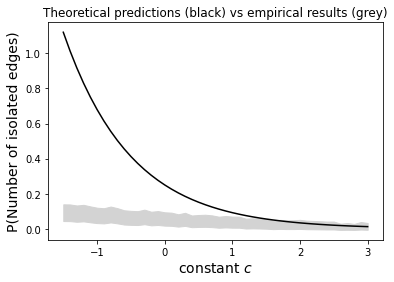

In [ ]:
n = 100
#n = 10000
REP = 1000 ## repeats
lo = -int(np.floor(np.log(np.log(n))*10))/10
if lo<-3:
    lo = -3
C = np.arange(lo,3.1,.1)

ic_avg=[]
for c in C:
    i=0
    x = []
    p = (c+np.log(n)+np.log(np.log(n)))/(2*n)
    for rep in range(REP):        
        g = ig.Graph.Erdos_Renyi(n=n, p=p)
        for i in range(len(g.connected_components())):
            x.append(int(len(g.connected_components()[i])==2))
    ic_avg.append(np.mean(x))

## theoretical
th = [np.exp(-c)/4 for c in C]

## plot
plt.fill_between(C,[x-1.654*np.sqrt(x*(1-x)/n) for x in ic_avg],
                 [x+1.645*np.sqrt(x*(1-x)/n) for x in ic_avg],color='lightgray')
plt.plot(C,th,color='black')
plt.title('Theoretical predictions (black) vs empirical results (grey)')
plt.xlabel(r'constant $c$',fontsize=14)
plt.ylabel('P(Number of isolated edges)',fontsize=14);

The above graph is for n=100

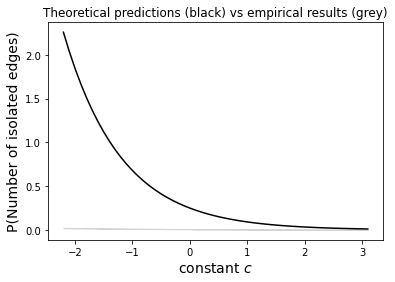

In [ ]:
#n = 100
n = 10000
REP = 1000 ## repeats
lo = -int(np.floor(np.log(np.log(n))*10))/10
if lo<-3:
    lo = -3
C = np.arange(lo,3.1,.1)

ic_avg=[]
for c in C:
    i=0
    x = []
    p = (c+np.log(n)+np.log(np.log(n)))/(2*n)
    for rep in range(REP):        
        g = ig.Graph.Erdos_Renyi(n=n, p=p)
        for i in range(len(g.connected_components())):
            x.append(int(len(g.connected_components()[i])==2))
    ic_avg.append(np.mean(x))

## theoretical
th = [np.exp(-c)/4 for c in C]

## plot
plt.fill_between(C,[x-1.654*np.sqrt(x*(1-x)/n) for x in ic_avg],
                 [x+1.645*np.sqrt(x*(1-x)/n) for x in ic_avg],color='lightgray')
plt.plot(C,th,color='black')
plt.title('Theoretical predictions (black) vs empirical results (grey)')
plt.xlabel(r'constant $c$',fontsize=14)
plt.ylabel('P(Number of isolated edges)',fontsize=14);

The above graph is for n=10,000

# Question 6

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import igraph as ig

In [ ]:
n = 10000
p=1/4

g1 = ig.Graph.Erdos_Renyi(n=n, p=p)
#ig.plot(g1, bbox=(0,0,300,300))


In [ ]:
g2 = ig.Graph.Erdos_Renyi(n=n, p=p)
#ig.plot(g2, bbox=(0,0,300,300))

In [ ]:
g_union = g1.union(g2)
#ig.plot(g_union, bbox=(0,0,300,300))

In [ ]:
print('The density of G1 U G2 is', g_union.density())

The density of G1 U G2 is 0.43743798379837984


The density of G1 ∪ G2 is nearly equal to 1/4+1/4=1/2

# Question 7

In [3]:
x = np.arange(0,1,.01)
local_co = []
global_co = []
for p in x:
    wg = ig.Graph.Watts_Strogatz(dim=2, size=100, nei=8, p=p)
    local_co.append(wg.transitivity_avglocal_undirected())
    global_co.append(wg.transitivity_undirected())
    

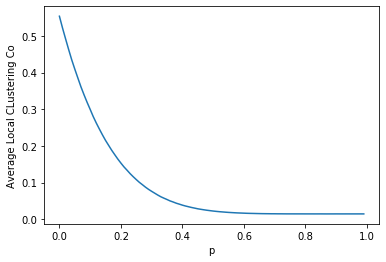

In [4]:
plt.xlabel('p')
plt.ylabel('Average Local CLustering Co')
plt.plot(x, local_co, label = 'Average Local Clustering Co')


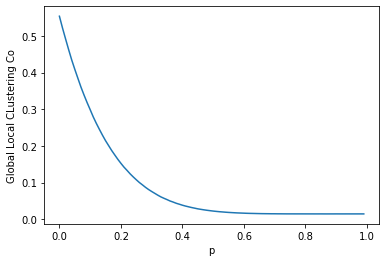

In [5]:
plt.xlabel('p')
plt.ylabel('Global Local CLustering Co')
plt.plot(x, global_co, label = 'Global Clustering Co')


# Question 8

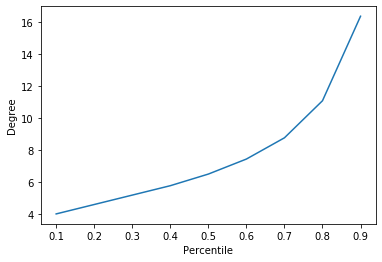

In [6]:
wb = ig.Graph.Barabasi(n=10000, m=5)
deg = wb.degree()
e = ecdf(deg)

a = sorted(set(deg))
edf_a = [e(i) for i in a]
inverted_cdf = interp1d(edf_a, a, fill_value='extrapolate')

x = np.arange(0.1, 1, 0.1)
y = inverted_cdf(x)
plt.xlabel('Percentile')
plt.ylabel('Degree')
plt.plot(x, y)


In [7]:
kstest(deg, e)

KstestResult(statistic=0.2724, pvalue=0.0)